In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

from itertools import cycle
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Additional Exploratory Ideas:
For our additional exploratory ideas, we decided to really dive into the visualization of the prediction results on the validation set from our deep neural net to try to understand what is going on.

In [12]:
# Load actual and predicted multilabels on the validation dataset
y_pred = np.load('data/y_pred.npy')
y_actual = np.load('data/y_test.npy')
# Genre names
genre_names_index = pickle.load(open('data/cols.pkl', 'rb'))

## Multiclass ROC Curve
To see how well our neural network performed on a per-genre basis, we can plot an ROC curve for each genre:

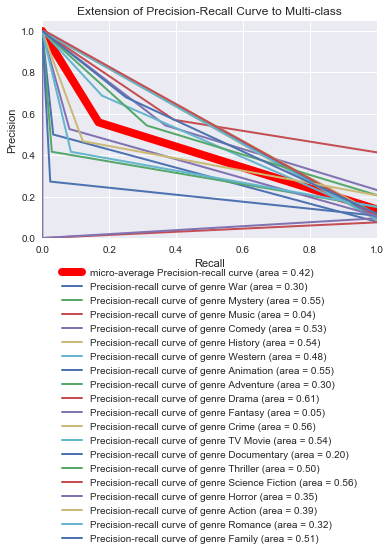

In [55]:
# setup plot details
lw = 2

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y_pred.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_actual[:,i],
                                                        y_pred[:,i])
    average_precision[i] = average_precision_score(y_actual[:, i], y_pred[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_actual.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_actual, y_pred,
                                                     average="micro")


# Plot Precision-Recall curve for each genre
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='red', lw=8,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(y_pred.shape[1]):
    plt.plot(recall[i], precision[i], lw=lw,
             label='Precision-recall curve of genre {0} (area = {1:0.2f})'
                   ''.format(genre_names_index[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall Curve to Multi-class')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

Unfortunately, the performance looks rather poor (given that 0.5 is the area under curve for a completely random classifier).

Our neural net seems to perform ok (AUC > 0.5) on Drama, Science Fiction, Mystery and Animation (among a few others). It performs worst on Music, Fantasy and Documentary.

That said, given that we tried to directly tackle the challenging task of multilabel prediction, these results (though disappointing) are not terribly surprising.

# What's the "average" genre multilabel predicted by deep learning?
Now that we have predictions on our validation dataset for genre multilabels, how does the "average" genre multilabel compare to the actual "average" genre multilabel?